In [1]:
"""%pip install chessboard"""

'%pip install chessboard'

In [2]:
import chess, random, torch
from matplotlib import pyplot as plt
from IPython.display import Image, display, clear_output

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
#board = chess.Board("r1bqkb1r/pppp1Qpp/2n2n2/4p3/2B1P3/8/PPPP1PPP/RNB1K1NR")
board = chess.Board()
board.fen()

'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1'

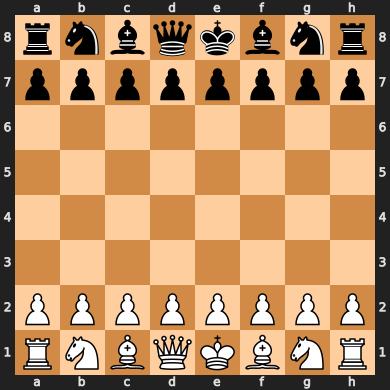

In [5]:
board

invalid_move


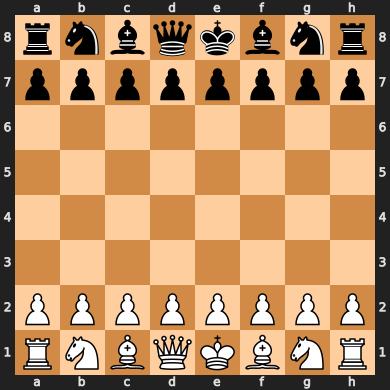

In [6]:
move = chess.Move.from_uci("g7g6") 
if move in board.legal_moves:
    board.push(move)
else:
    print("invalid_move")
board

In [7]:
board.outcome()

In [8]:
legal_moves = list(board.legal_moves)
legal_moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [9]:
chess_letters = 'abcdefgh'
spawnable_pieces = "qrbn"
def all_moves_generator():
    for i in chess_letters:
        for j in range(1, 9, 1):
            for k in chess_letters:
                for l in range(1, 9, 1):
                    if l == 1 or l == 8:
                        for m in spawnable_pieces:
                            try:
                                yield chess.Move.from_uci(f"{i}{j}{k}{l}{m}")
                            except:
                                pass
                    try:
                        yield chess.Move.from_uci(f"{i}{j}{k}{l}")
                    except:
                        pass

all_moves = list(all_moves_generator())
all_moves

[Move.from_uci('a1a2'),
 Move.from_uci('a1a3'),
 Move.from_uci('a1a4'),
 Move.from_uci('a1a5'),
 Move.from_uci('a1a6'),
 Move.from_uci('a1a7'),
 Move.from_uci('a1a8q'),
 Move.from_uci('a1a8r'),
 Move.from_uci('a1a8b'),
 Move.from_uci('a1a8n'),
 Move.from_uci('a1a8'),
 Move.from_uci('a1b1q'),
 Move.from_uci('a1b1r'),
 Move.from_uci('a1b1b'),
 Move.from_uci('a1b1n'),
 Move.from_uci('a1b1'),
 Move.from_uci('a1b2'),
 Move.from_uci('a1b3'),
 Move.from_uci('a1b4'),
 Move.from_uci('a1b5'),
 Move.from_uci('a1b6'),
 Move.from_uci('a1b7'),
 Move.from_uci('a1b8q'),
 Move.from_uci('a1b8r'),
 Move.from_uci('a1b8b'),
 Move.from_uci('a1b8n'),
 Move.from_uci('a1b8'),
 Move.from_uci('a1c1q'),
 Move.from_uci('a1c1r'),
 Move.from_uci('a1c1b'),
 Move.from_uci('a1c1n'),
 Move.from_uci('a1c1'),
 Move.from_uci('a1c2'),
 Move.from_uci('a1c3'),
 Move.from_uci('a1c4'),
 Move.from_uci('a1c5'),
 Move.from_uci('a1c6'),
 Move.from_uci('a1c7'),
 Move.from_uci('a1c8q'),
 Move.from_uci('a1c8r'),
 Move.from_uci('a1c8b'

In [10]:
all_pieces = "rnbqkbnrpPRNBQKBNR"
def get_all_pieces_pos_dict():
    pieces_pos = {}
    piece_pos = 0
    for piece in all_pieces:
        if piece not in pieces_pos.keys():
            pieces_pos[piece] = piece_pos
            piece_pos += 1
    return pieces_pos
all_pieces_pos_dict = get_all_pieces_pos_dict()
n_pieces = len(all_pieces_pos_dict.keys())
n_pieces, all_pieces_pos_dict

(12,
 {'r': 0,
  'n': 1,
  'b': 2,
  'q': 3,
  'k': 4,
  'p': 5,
  'P': 6,
  'R': 7,
  'N': 8,
  'B': 9,
  'Q': 10,
  'K': 11})

In [11]:
empty_tensor = torch.zeros(n_pieces, dtype=torch.float32, device=device)
all_pieces_tensors = [
                        torch.tensor([
                            1 if i == pos else 0
                            for i in range(n_pieces)
                        ],dtype=torch.float32, device=device)
                        for piece, pos in all_pieces_pos_dict.items()
                    ]
all_pieces_tensors, empty_tensor

([tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0'),
  tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0'),
  tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0'),
  tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0'),
  tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0'),
  tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], device='cuda:0'),
  tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], device='cuda:0'),
  tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], device='cuda:0'),
  tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], device='cuda:0'),
  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], device='cuda:0'),
  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], device='cuda:0'),
  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], device='cuda:0')],
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0'))

In [12]:
#phi
def phi(board_fen: str) -> torch.tensor:
    obs = []
    for i, piece in enumerate(board_fen):
        if piece == '/':
            continue
        if piece.isdigit():
            for i in range(int(piece)):
                obs.append(empty_tensor)
            continue
        if piece == " ":
            color_turn = 1 if board_fen[i+1] == "w" else 0
            obs.append(torch.tensor([color_turn], dtype=torch.float32, device=device))
            break
        piece_pos = all_pieces_pos_dict[piece]
        obs.append(all_pieces_tensors[piece_pos])
    return torch.cat(obs).unsqueeze(0)

obs = phi(board_fen=board.fen())
obs.shape

torch.Size([1, 769])

In [13]:
from src.model.model import valid_actions, mask_invalid_actions

valid_actions(board, all_moves)

[128,
 129,
 1014,
 1041,
 1152,
 1153,
 2176,
 2177,
 3200,
 3201,
 4224,
 4225,
 5248,
 5249,
 6134,
 6161,
 6272,
 6273,
 7296,
 7297]

In [14]:
D = 40_000

GAMMA = 0.99
LR = 0.0003
TAU = 0.05

# NUM_EPISODES = 10000
BATCH_SIZE = 100
K = BATCH_SIZE // 2

EPS = 0.8
EPS_DECAY = 0.9999
EPS_MIN = 0.01

epsilon = EPS

In [15]:
input_size = obs.shape[1]
action_space = len(all_moves)
input_size, action_space

(769, 8064)

In [16]:
from src import PrioritizedReplayMemory

# Initiliaze replay memory D to capacity N
replay_memory = PrioritizedReplayMemory(D, device)

beta_start = 0.4
beta_frames = D  # Total frames over which beta will be annealed from beta_start to 1
beta_by_frame = lambda frame_idx: min(1.0, beta_start + frame_idx * (1.0 - beta_start) / beta_frames)

# Your main training loop here


In [17]:
from tensorboardX import SummaryWriter
import time

timestr = time.strftime("%Y_%m_%d_%H_%M_%S")

In [18]:
import torch.optim as optim
from src.model.model import DQN

policy_net = DQN(input_size=input_size, action_space=action_space).to(device)
target_net = DQN(input_size=input_size, action_space=action_space).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.SGD(policy_net.parameters(), lr=LR) # amsgrad? r:

global_step = 0
step = 0

if torch.cuda.is_available():
  max_epoch = D
else:
  max_epoch = 50

h_params = {
    'REPLAY_SIZE': D,
    'BATCH_SIZE': BATCH_SIZE,
    'GAMMA': GAMMA,
    'TAU': TAU,
    'LR': LR,
}

In [19]:
board.outcome()

In [20]:
WIN_REWARD = 100
LOST_REWARD = -10
DRAW_REWARD = 0
INVALID_REWARD = -20

In [21]:
def tensor_reward(reward):
    return torch.tensor([reward], dtype=torch.float32, device=device)

In [29]:
from itertools import count
import numpy as np

with SummaryWriter(log_dir=f'duel_runs/{timestr}') as writer:
    writer.add_hparams(h_params, {})
    while global_step < max_epoch:
        print("game reseted")
        
        ep_losses = []
        ep_rewards = []
        ep_qvalues = []
        ep_epsilon = []

        board.reset()
        obs = phi(board.fen())
        
        prev_obs = None
        prev_action = None
        done = False
        oponent_done = False

        ai_turn = random.random() < 0.5
        ai_color = "white" if ai_turn else "black"
        is_ai_white = ai_turn
        for t in count():
            if not ai_turn:
                action = random.choice(valid_actions(board, all_moves))
                board.push(move=all_moves[action])
                # ai_turn = not ai_turn

                oponent_done = board.is_game_over()
                if oponent_done:
                    if board.outcome().termination == chess.Termination.CHECKMATE:
                        print(f"winner is {board.outcome().winner}")                             
                        ai_reward += LOST_REWARD if board.outcome().winner == is_ai_white else WIN_REWARD
                        print("ai lost")
                    else:
                        ai_reward = INVALID_REWARD
                    obs = None
                    va_index = None
                    replay_memory.push(prev_obs, prev_action, tensor_reward(ai_reward), obs, va_index)
                    
                    ep_rewards.append(ai_reward)
                    writer.add_scalar('Reward/step_reward', ai_reward, step)
                    writer.add_scalar('Qvalue/step_qvalue', qvalue, step)
                    break
            else:
                obs = phi(board.fen())
                va_index = valid_actions(board=board, all_moves=all_moves)
                with torch.no_grad():
                    q_values = policy_net(obs)
                    
                    # Assuming q_values is the output of the network, and state is the current state
                    q_values_masked = mask_invalid_actions(q_values, va_index)
                    
                    max_q_value = q_values_masked.max(1)
                    qvalue = max_q_value[0].item()
                
                    action = max_q_value[1].view(1,1).item()
                        
                    # epsilon = epsilon * EPS_DECAY
                    epsilon = EPS - (step / max_epoch) if epsilon > EPS_MIN else EPS_MIN
                    
                if random.random() < epsilon:
                    action = random.choice(valid_actions(board, all_moves))
                
                board.push(move=all_moves[action])
                # next_obs = phi(board.fen())

                action = torch.tensor([[action]], dtype=torch.long, device=device)

                ai_reward = 0
                is_white_turn = board.turn

                done = board.is_game_over()
                
                if done:
                    clear_output(wait=True)
                    display(board)
                    print(f"ai is {ai_color};")
                    print(f"Outcome was: {board.outcome()}")
                    if board.outcome().termination == chess.Termination.CHECKMATE:    
                        print(f"winner is {board.outcome().winner}")                    
                        ai_reward += WIN_REWARD if board.outcome().winner == is_ai_white else LOST_REWARD
                        print("ai win")
                    else:
                        ai_reward += INVALID_REWARD
                    va_index = None
                    obs = None
                    
                ep_rewards.append(ai_reward)
                ep_qvalues.append(qvalue)
                ep_epsilon.append(epsilon)
                
                writer.add_scalar('Reward/step_reward', ai_reward, step)
                writer.add_scalar('Qvalue/step_qvalue', qvalue, step)

                if prev_obs != None:
                    replay_memory.push(prev_obs, prev_action, tensor_reward(ai_reward), obs, va_index)

                if BATCH_SIZE < len(replay_memory) and step % K == 0:
                    sample = replay_memory.sample(BATCH_SIZE, beta_by_frame(step))
                    loss = policy_net.q_train(
                        target_net=target_net,
                        optimizer=optimizer,
                        loss_fn=None,
                        sample=sample,
                        gamma=GAMMA,
                        replay_memory=replay_memory,
                        device=device
                    )

                    target_net_state_dict = target_net.state_dict()
                    policy_net_state_dict = policy_net.state_dict()

                    # Soft update of the target network's weights
                    # θ′ ← τ θ + (1 −τ )θ′
                    for key in policy_net_state_dict:
                        target_net_state_dict[key] = policy_net_state_dict[key]*TAU + target_net_state_dict[key]*(1-TAU)
                    target_net.load_state_dict(target_net_state_dict)
                    ep_losses.append(loss.item())

                    writer.add_scalar('Loss/step_loss', loss.item(), step)

                step+=1
                done = board.is_game_over()
                if done:
                    print("breaking...")
                    break

                # memory.push(obs, action, next_obs, reward)
                
                prev_action = action
                prev_obs = obs

            ai_turn = not ai_turn
        try:
            print(f"2winner is {board.outcome().winner}")          
        except:
            pass    
        if BATCH_SIZE < len(replay_memory):
            loss_mean = np.mean(ep_losses)
            rewards_mean = np.mean(ep_rewards)
            qvalues_mean = np.mean(ep_qvalues)
            epsilons_mean = np.mean(ep_epsilon)
            print(f"loss_mean: {loss_mean}, rewards_mean: {rewards_mean}, global_step: {global_step}")
            # reward_log = ep_rewards[-1] if ep_rewards != [] else 0
            writer.add_scalar('i_episode', t, global_step)  # Example: log loss scalar
            writer.add_scalar('Memory_len', len(replay_memory), global_step)  # Example: log loss scalar
            writer.add_scalar('Loss/mean', loss_mean, global_step)  # Example: log loss scalar
            writer.add_scalar('Reward/reward_mean', rewards_mean, global_step)  # Example: log loss scalar
            writer.add_scalar('Qvalue/mean', qvalues_mean, global_step)  # Example: log loss scalar
            writer.add_scalar('Epsilon/epsilons_mean', epsilons_mean, global_step)  # Example: log loss scalar

            """writer.add_hparams(
                h_params,
                {
                    'i_episode': t,
                    'Memory_len': len(replay_memory),
                    'Loss/mean': loss_mean, # loss_scalar,
                    'Reward/reward_mean': rewards_mean,
                    'Qvalue/mean': qvalues_mean,
                    'Epsilon/epsilons_mean': epsilons_mean
                }, name='.', global_step=global_step,
            )"""
        
        global_step += 1 

game reseted


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f3688dbe260>>
Traceback (most recent call last):
  File "/home/glucas11/tools/venvs/deep_learning/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


TypeError: expected Tensor as element 79 in argument 0, but got NoneType

In [ ]:
writer.flush()

In [ ]:
valid_actions(board, all_moves)

In [ ]:
board

In [ ]:
board.fen()

In [ ]:

legal_moves = list(board.legal_moves)
legal_moves

In [ ]:
board.push_uci("h2h1q")
board

In [ ]:
board.is_game_over()

In [ ]:
Board

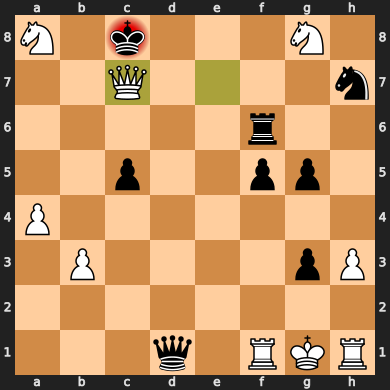

ai is white
breaking...


KeyboardInterrupt: Interrupted by user

In [30]:
from itertools import count

while True:
        print("game reseted")
        
        ep_losses = []
        ep_rewards = []
        ep_qvalues = []
        ep_epsilon = []

        board.reset()
        obs = phi(board.fen())
        
        prev_obs = None
        prev_action = None
        done = False
        oponent_done = False

        ai_turn = random.random() < 0.5
        ai_color = "white" if ai_turn else "black"
        is_ai_white = ai_turn
        for t in count():
            if not ai_turn:
                action = random.choice(valid_actions(board, all_moves))
                board.push(move=all_moves[action])
                # ai_turn = not ai_turn

                oponent_done = board.is_game_over()
                if oponent_done:
                    if board.outcome().termination == chess.Termination.CHECKMATE:
                        print(f"winner is {board.outcome().winner}")                             
                        ai_reward += LOST_REWARD if board.outcome().winner == is_ai_white else WIN_REWARD
                        print("ai lost")
                    else:
                        ai_reward = INVALID_REWARD
                    obs = None
                    va_index = None
                    replay_memory.push(prev_obs, prev_action, tensor_reward(ai_reward), obs, va_index)
                    break
            else:
                obs = phi(board.fen())
                va_index = valid_actions(board=board, all_moves=all_moves)
                with torch.no_grad():
                    q_values = policy_net(obs)
                    
                    # Assuming q_values is the output of the network, and state is the current state
                    q_values_masked = mask_invalid_actions(q_values, va_index)
                    
                    max_q_value = q_values_masked.max(1)
                    qvalue = max_q_value[0].item()
                
                    action = max_q_value[1].view(1,1).item()
                        
                    # epsilon = epsilon * EPS_DECAY
                
                board.push(move=all_moves[action])
                # next_obs = phi(board.fen())

                is_white_turn = board.turn

                done = board.is_game_over()
                
                if done:
                    clear_output(wait=True)
                    display(board)
                    print(f"ai is {ai_color};")
                    print(f"Outcome was: {board.outcome()}")
                    if board.outcome().termination == chess.Termination.CHECKMATE:    
                        print(f"winner is {board.outcome().winner}")                    
                        # ai_reward += WIN_REWARD if board.outcome().winner == is_ai_white else LOST_REWARD
                        print("ai win")
                        
                clear_output(wait=True)
                display(board)
                print(f"ai is {ai_color}")
                time.sleep(0.1)
                
                if done:
                    print("breaking...")
                    break

            ai_turn = not ai_turn

        input()
        print(f"2winner is {board.outcome().winner}")          
        
